In [1]:
# Importation des bibliotheques necessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
#chargement des donnees

iris = load_iris()
data = iris.data
df = pd.DataFrame(data = iris.data, columns = iris.feature_names) 

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
"""Pour implementer notre classification hierachique descendante, nous allons definir une fonction dans laquelle nous ferons appel a l'algorithme k-means de maniere reccursive pour divisiser a chaque fois nos clusters de facon a maximiser la variance inter cluster"""

# Fonction de division

def division_hierachique(data, n_clusters):
    clusters = {0: data}
    next_cluster_label = 1
    labels = np.zeros(data.shape[0])  # Initialiser labels

    while len(clusters) < n_clusters:
        largest_cluster = max(clusters, key=lambda k: len(clusters[k]))
        data_to_split = clusters.pop(largest_cluster)

        kmeans = KMeans(n_clusters=2, random_state=0).fit(data_to_split)
        sub_labels = kmeans.labels_

        # Mettre à jour les labels globaux
        labels[np.where(sub_labels == 0)] = next_cluster_label
        labels[np.where(sub_labels == 1)] = next_cluster_label + 1

        clusters[next_cluster_label] = data_to_split[sub_labels == 0]
        clusters[next_cluster_label + 1] = data_to_split[sub_labels == 1]
        next_cluster_label += 2

    return clusters, labels

C:\Users\Christian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Christian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Christian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Christian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL

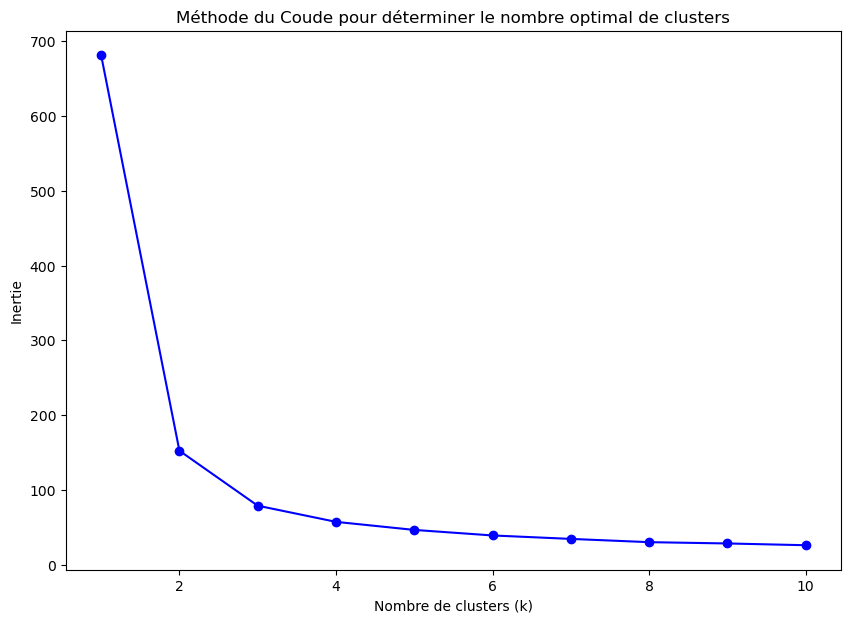

In [7]:
"""Pour choisir le nombre de cluster optimal, nous utiliserons la methode du coude"""

# Fonction pour calculer la méthode du coude
def methode_coude(data):
    inertia = []
    k_range = range(1, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 7))
    plt.plot(k_range, inertia, 'bo-')
    plt.xlabel('Nombre de clusters (k)')
    plt.ylabel('Inertie')
    plt.title('Méthode du Coude pour déterminer le nombre optimal de clusters')
    plt.show()
    
# Appliquons la methode du coude a notre jeu de donnees
methode_coude(data)

In [8]:
"""D'apres la methode du coude, on constate que le point du coude se trouve a 3 donc le nombre optimal de clusters a former est donc 03"""

# Appliquons notre division hierachique a nos donnees pour 03 clusters

clusters, labels = division_hierachique(data, n_clusters = 3)

# Affichons les resultats

for label, cluster in clusters.items():
    print(f'Cluster {label}: {len(cluster)} points')

C:\Users\Christian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Christian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Christian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Christian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL

Cluster 1: 53 points
Cluster 3: 59 points
Cluster 4: 38 points


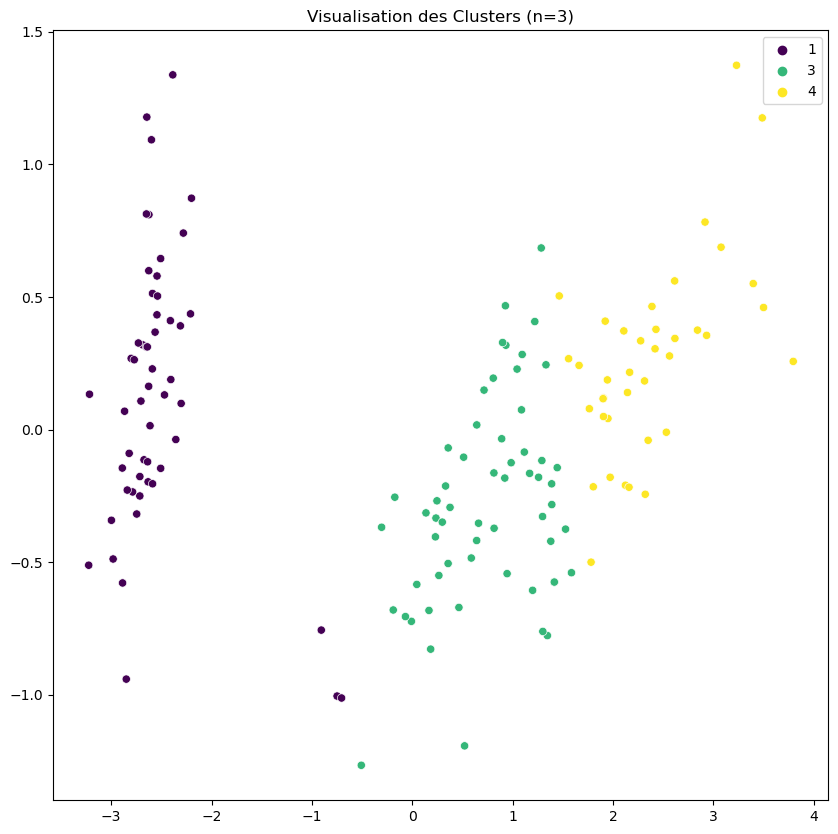

In [9]:
# Visualisons les resultats

"""Ici nous sommes confronter a un probleme de dimensionalité. En effet nos donnees (data) contiennent 4 composantes, mais nous ne voulons visualiser le resultat de notre clustering dans un espace a 2 dimensions. Pour cela, nous allons donc reduire la dimensions de nos donnees a 2 tout en conservant le maximun d'information grace a une decomposition en analyse principale (ACP)"""

from sklearn.decomposition import PCA

def afficher_clusters(clusters, n_clusters):
    # Combinons tous les clusters dans un simple tableau avec des labels
    all_data = []
    all_labels = []
    for label, cluster in clusters.items():
        all_data.append(cluster)
        all_labels.extend([label] * len(cluster))

    all_data = np.vstack(all_data)
    all_labels = np.array(all_labels)

    # Réduction de dimension avec PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(all_data)

    # Tracons les clusters
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=all_labels, palette='viridis')
    plt.title(f'Visualisation des Clusters (n={n_clusters})')
    plt.show()

# Visualisons les résultats
afficher_clusters(clusters, n_clusters=3)


In [10]:
"""Pour l'evaluation de notre modele nous utiliserons le coefficient de silhouette et l'indice de Davies Bouldin"""

# Coefficient de silhouette

from sklearn.metrics import silhouette_score

silhouette = silhouette_score(data, labels)
print("Le coefficient de silhouette est :", silhouette)

Le coefficient de silhouette est : 0.17647891150772627


In [11]:
# Indice de Davies Bouldin

from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(data, labels)
print("L'indice de Davies Bouldin est:" ,score)

L'indice de Davies Bouldin est: 0.9814240717041831
